# install

## I

In [1]:
# Install (versions compatibles + évite le package `keras` standalone)
%pip install -U pip setuptools wheel
%pip install -U tabulate scikit-learn pandas numpy matplotlib seaborn gensim "tensorflow==2.16.1"

# Test TensorFlow (ne fait pas planter le notebook si l'environnement Windows manque de DLL)
try:
	import tensorflow as tf
	print("TensorFlow:", tf.__version__)
	print(tf.reduce_sum(tf.random.normal([1000, 1000])))
except Exception as e:
	print("TensorFlow n'a pas pu se charger (runtime natif / DLL).")
	print("Erreur:", repr(e))
	print("\nPistes courantes (Windows):")
	print(" - Installer/mettre à jour 'Microsoft Visual C++ Redistributable 2015-2022 (x64)'")
	print(" - Éviter Python du Microsoft Store: utiliser python.org/conda + nouveau venv")
	print(" - CPU trop ancien (AVX requis): utiliser un autre environnement (WSL/conda) ou une build no-AVX")

Defaulting to user installation because normal site-packages is not writeableNote: you may need to restart the kernel to use updated packages.

^C
Note: you may need to restart the kernel to use updated packages.
Defaulting to user installation because normal site-packages is not writeable
  Using cached numpy-2.2.6-cp310-cp310-win_amd64.whl.metadata (60 kB)
TensorFlow: 2.16.1
tf.Tensor(1062.485, shape=(), dtype=float32)


## Si echec - diagnostic

In [ ]:
# Diagnostic TensorFlow (sortie courte, utile sous Windows)
import sys, platform, site, pathlib, traceback

print("Python:", sys.version.replace("\n", " "))
print("Executable:", sys.executable)
print("Platform:", platform.platform())
print("Machine:", platform.machine())

site_paths = []
try:
    site_paths = site.getsitepackages()
except Exception:
    site_paths = [site.getusersitepackages()]
print("Site-packages:")
for p in site_paths:
    print(" -", p)

# Cherche des traces d'une install cassée (ex: dossier '~ensorflow' -> warning pip)
for p in site_paths:
    base = pathlib.Path(p)
    if base.exists():
        bad = sorted([x.name for x in base.glob("~ensorflow*")])
        if bad:
            print("\nTraces suspectes dans", str(base))
            for name in bad:
                print(" -", name)

print("\nTest import tensorflow...")
try:
    # Évite un vieux module resté en mémoire après uninstall/reinstall
    for k in list(sys.modules.keys()):
        if k == "tensorflow" or k.startswith("tensorflow.") or k.startswith("keras") or k.startswith("tensorboard"):
            sys.modules.pop(k, None)

    import tensorflow as tf
    print("tensorflow module:", tf)
    print(" - __file__:", getattr(tf, "__file__", None))
    spec = getattr(tf, "__spec__", None)
    if spec is not None:
        print(" - spec.origin:", spec.origin)
        print(" - spec.submodule_search_locations:", list(spec.submodule_search_locations or []))
    print("OK TensorFlow:", tf.__version__)
except Exception as e:
    print("ECHEC import TensorFlow:", repr(e))
    print("\nTraceback (résumé):")
    print(traceback.format_exc())

## Si echec - cleanup

In [8]:
# Cleanup TensorFlow/Keras (corrige les résidus type `~ensorflow` + réinitialise l'install)
# À exécuter si l'import TF est cassé / warnings pip `Ignoring invalid distribution ~ensorflow`
import sys, site, pathlib, shutil

print("Python executable:", sys.executable)
if "WindowsApps" in sys.executable:
    print("⚠️ Python Microsoft Store détecté : c'est une source fréquente de soucis avec TF. ")
    print("   Recommandé: Python depuis python.org/Miniconda + venv, puis re-sélectionner le kernel.")

# 1) Désinstall propre via pip (dans le kernel courant)
%pip uninstall -y tensorflow tensorflow-intel tensorflow-cpu keras keras-nightly tensorboard tensorboard-data-server tensorflow-estimator

# 2) Suppression des résidus dans le site-packages UTILISATEUR (pas dans WindowsApps)
user_sp = pathlib.Path(site.getusersitepackages())
print("User site-packages:", user_sp)

patterns = [
    "~ensorflow*", "tensorflow", "tensorflow-*dist-info", "tensorflow_*dist-info",
    "~keras*", "keras", "keras-*dist-info",
    "tensorboard", "tensorboard-*dist-info", "tensorboard_data_server*",
    "tensorflow_estimator*", "tensorflow_io_gcs_filesystem*"
 ]

removed = []
if user_sp.exists():
    for pat in patterns:
        for path in user_sp.glob(pat):
            try:
                if path.is_dir():
                    shutil.rmtree(path, ignore_errors=True)
                else:
                    path.unlink(missing_ok=True)
                removed.append(str(path))
            except Exception as e:
                print("Impossible de supprimer", path, "->", repr(e))
else:
    print("User site-packages introuvable (", user_sp, ")")

print("\nSupprimé (résumé):")
if removed:
    for p in removed[:50]:
        print(" -", p)
    if len(removed) > 50:
        print(f" ... +{len(removed)-50} autres")
else:
    print("(rien à supprimer, ou déjà propre)")

print("\nEnsuite:")
print("1) Redémarre le kernel")
print("2) Relance la cellule Install (TensorFlow==2.16.1)")
print("3) Relance la cellule Diagnostic")

Python executable: c:\Program Files\Python310\python.exe
Found existing installation: tensorflow 2.16.1
Uninstalling tensorflow-2.16.1:
  Successfully uninstalled tensorflow-2.16.1
Found existing installation: tensorflow-intel 2.16.1
Uninstalling tensorflow-intel-2.16.1:
  Successfully uninstalled tensorflow-intel-2.16.1
Found existing installation: keras 3.12.1
Uninstalling keras-3.12.1:
  Successfully uninstalled keras-3.12.1
Found existing installation: tensorboard 2.16.2
Uninstalling tensorboard-2.16.2:
  Successfully uninstalled tensorboard-2.16.2
Found existing installation: tensorboard-data-server 0.7.2
Uninstalling tensorboard-data-server-0.7.2:
  Successfully uninstalled tensorboard-data-server-0.7.2
Found existing installation: tensorflow-estimator 2.10.0
Uninstalling tensorflow-estimator-2.10.0:
  Successfully uninstalled tensorflow-estimator-2.10.0
Note: you may need to restart the kernel to use updated packages.
User site-packages: C:\Users\hugog\AppData\Roaming\Python\Pyt

# Importation des librairies

In [1]:
# Suppression des avertissements liés à Scikit-learn
import warnings  # Masquer les avertissements (ex. : FutureWarning)
warnings.filterwarnings("ignore", category=FutureWarning)

# Librairies générales
import pandas as pd  # Librairie pour la manipulation de données
import numpy as np  # Librairie pour le calcul numérique
import sys  # Fonctions et variables liées à l'interpréteur Python
import copy  # Création de copies d'objets
from numpy import mean, std  # Fonctions de calcul de moyenne et d'écart type
import zipfile  # Traitement de fichiers zip
import os  # Manipulation de fichiers et chemins

# Librairie affichage
import matplotlib.pyplot as plt  # Outils de visualisation 2D
from matplotlib import pyplot  # Interface de la bibliothèque Matplotlib
import seaborn as sns  # Bibliothèque de visualisation de données basée sur Matplotlib

# Scikit-learn pour l'évaluation des modèles
from sklearn.metrics import confusion_matrix  # Matrice de confusion
from sklearn.model_selection import KFold  # Outils de validation croisée
from sklearn.metrics import accuracy_score  # Calcul de l'accuracy
from sklearn.model_selection import train_test_split  # Découpage train/test

# TensorFlow et Keras
import tensorflow as tf  # Librairie de deep learning
import keras  # API haut niveau pour construire et entraîner des modèles de deep learning
from keras import layers  # Modules de couches pour construire des modèles Keras
from keras import models  # Outils pour créer des modèles Keras
from keras import optimizers  # Outils d'optimisation
from tensorflow.keras.preprocessing.image import ImageDataGenerator  # Générateur d'images pour l'augmentation des données
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping  # Rappels pour le suivi et l'arrêt précoce
from keras.layers import Input, Dense, Dropout, Flatten, Lambda  # Types de couches Keras
from keras.layers import Conv2D, MaxPooling2D  # Couches convolutionnelles et de pooling
from keras.preprocessing import image  # Outils de prétraitement d'images
from tensorflow.keras.models import Model, load_model  # Définition / chargement de modèles
from keras.datasets import fashion_mnist  # Jeu de données Fashion MNIST
from tensorflow.keras.utils import to_categorical  # Conversion en encodage one-hot
from tensorflow.keras.optimizers import SGD  # Optimiseur Stochastic Gradient Descent
from tensorflow.keras.applications.resnet50 import ResNet50  # Modèle ResNet50 pré-entraîné
from tensorflow.keras.preprocessing import image  # Prétraitement d'images pour les modèles Keras

# Affichage des résultats

In [ ]:
# histories: Liste d'history, des objets donnés par model.fit()
#   - history.history: Dictionnaire
#         - 'loss': Loss sur les données d'entraînement par époques, liste de float
#         - 'val_loss': Loss sur des données de validation par époques, liste de float
#         - 'accuracy': Précision sur les données d'entraînement par époques, liste de float
#         - 'val_accuracy': Précision sur des données de validation par époques, liste de float
#   Exemple:
#       histories[0].history['loss'] = [0.8, 0.6, 0.4, ...]

# Cette fonction va servir à afficher la courbe d'accuracy et de loss, pour les données d'entrainement et de validation.
def plot_curves(histories):
    
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

    # Extraction du nombre d'époques d'après l'un des historiques
    # On aurait pu prendre un autre mais cela ne change rien
    epochs = range(len(histories[0].history['loss']))
    
    train_loss = [history.history['loss'] for history in histories]
    val_loss = [history.history['val_loss'] for history in histories]
    train_acc = [history.history['accuracy'] for history in histories]
    val_acc = [history.history['val_accuracy'] for history in histories]

    # Calcul des moyennes et des écart-types pour chaque époque
    mean_loss = np.mean(train_loss, axis=0)
    std_loss = np.std(train_loss, axis=0)

    mean_val_loss = np.mean(val_loss, axis=0)
    std_val_loss = np.std(val_loss, axis=0)
    
    mean_acc = np.mean(train_acc, axis=0)
    std_acc = np.std(train_acc, axis=0)
    
    mean_val_acc = np.mean(val_acc, axis=0)
    std_val_acc = np.std(val_acc, axis=0)

    # Couleurs pour les courbes
    train_color = '#2ca02c'
    val_color = '#9467bd'

    # Courbes de loss avec moyenne et écart-type
    ax1.plot(epochs, mean_loss, color=train_color, label='Train')
    ax1.fill_between(epochs, mean_loss - std_loss, mean_loss + std_loss, color=train_color, alpha=0.2)

    ax1.plot(epochs, mean_val_loss, color=val_color, label='Validation')
    ax1.fill_between(epochs, mean_val_loss - std_val_loss, mean_val_loss + std_val_loss, color=val_color, alpha=0.2)

    # Courbes d'accuracy avec moyenne et écart-type
    ax2.plot(epochs, mean_acc, color=train_color, label='Train')
    ax2.fill_between(epochs, mean_acc - std_acc, mean_acc + std_acc, color=train_color, alpha=0.2)

    ax2.plot(epochs, mean_val_acc, color=val_color, label='Validation')
    ax2.fill_between(epochs, mean_val_acc - std_val_acc, mean_val_acc + std_val_acc, color=val_color, alpha=0.2)
    
    k = len(histories)

    # Titres, labels et légendes
    ax1.set_title(f'Loss (k={k})')
    ax1.set_xlabel('Epoch')
    ax1.set_ylabel('Loss')
    ax1.legend()

    ax2.set_title(f'Accuracy (k={k})')
    ax2.set_xlabel('Epoch')
    ax2.set_ylabel('Accuracy')
    ax2.legend()

    plt.show()

# Stockage des modèles appris

In [4]:

#? Si possible, installez l'extension Better Comment sur Visual Studio Code pour des jolis commentaires

model_dir = "./cnn_models/"  # Répertoire où les modèles CNN seront stockés après extraction
zip_file = "cnn_models.zip"  # Nom temporaire du fichier ZIP téléchargé

# Création du répertoire cible s'il n'existe pas déjà
os.makedirs(model_dir, exist_ok=True)

# Téléchargement du fichier ZIP depuis un serveur
#? Sur Linux, vous pouvez utiliser wget directement :
#* !wget https://www.lirmm.fr/~poncelet/Ressources/cnn_models.zip
#? Sur Windows, utilisation de PowerShell pour télécharger le fichier
!Powershell.exe -Command ((new-object System.Net.WebClient).DownloadFile('https://www.lirmm.fr/~poncelet/Ressources/cnn_models.zip','cnn_models.zip'))

# Extraction du contenu du fichier ZIP dans le répertoire cible
with zipfile.ZipFile(zip_file, "r") as zip_ref:
    zip_ref.extractall(model_dir)

# Suppression du fichier ZIP, car inutile après extraction
os.remove(zip_file)


# Modèle: Fashion MNIST

## Prendre le modèle

In [5]:
# On prend le jeu de données de Fashion MNIST, dans tensorflow

fashion_mnist = tf.keras.datasets.fashion_mnist
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

print("Nombre d'exemples du jeu d'apprentissage : ", X_train.shape[0])
print("Nombre d'exemples du jeu de test : ", X_test.shape[0])
print ("Format du jeu d'apprentissage : ", X_train.shape)
print ("Format du jeu de test : ", X_test.shape)
print ("Format d'une image", X_train[0].shape)

Nombre d'exemples du jeu d'apprentissage :  60000
Nombre d'exemples du jeu de test :  10000
Format du jeu d'apprentissage :  (60000, 28, 28)
Format du jeu de test :  (10000, 28, 28)
Format d'une image (28, 28)


## Définir les données

Les étiquettes sont encodées sous forme d'entiers de 0 à 9 pour ce dataset, chaque entier correspondant à une catégorie de vêtement.

In [6]:
class_names = ['T-shirt/top', 'Pantalon', 'Pull', 'Robe', 'Manteau',
               'Sandale', 'Chemise', 'Baskets', 'Sac', 'Bottine']

## Affichage d'image

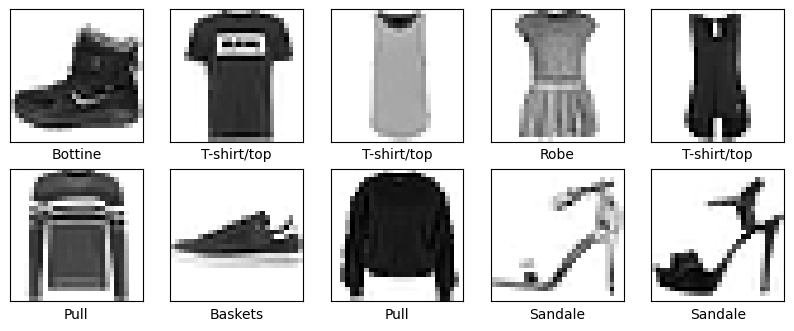

In [22]:
# Visualisation d'images du dataset

f_xsize = 10
f_ysize = 10
columns = 10

plt.figure(figsize=(f_xsize,f_ysize))

for i in range(columns):
    img = X_train[i]
    ticket = y_train[i]
    plt.subplot(5, 5, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(img,cmap=plt.cm.binary)
    plt.xlabel(class_names[ticket])

Il est important de normaliser les valeurs pour respecter le format des entrées attendues par le réseau de neurones, c'est-à-dire des valeurs de pixels comprises entre 0 et 1 plutôt que 0 à 255. Cela facilite la convergence du CNN lors de l'entraînement et stabilise les gradients.

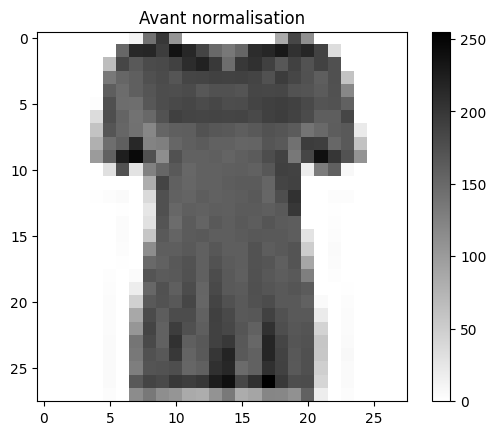

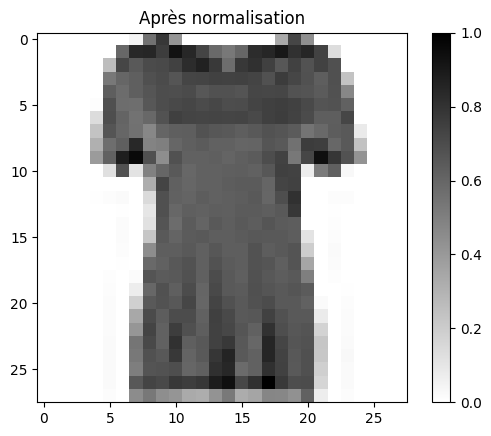

In [26]:
# Il est important de normaliser les valeurs pour respecter le format des ...

numimage=10
plt.figure()
plt.title("Avant normalisation")
plt.imshow(X_train[numimage], cmap=plt.cm.binary)
plt.colorbar()
plt.grid(False)
plt.show()

X_train_original=copy.deepcopy(X_train)
X_test_original=copy.deepcopy(X_test)

train_images = X_train / 255.0
test_images = X_test / 255.0

plt.figure()
plt.title("Après normalisation")
plt.imshow(train_images[numimage], cmap=plt.cm.binary)
plt.colorbar()
plt.grid(False)
plt.show()

# Des convolutions à la classification

Faire une convolution, c'est appliquer un filtre à une image. Le résultat est une image de taille:

$ Dimension\_image - Dimension\_filtre + 1 $

# Un modèle Baseline

In [27]:
# Afin de charger le jeu de données Fashion MNIST pour qu'il s'entraine

def load_dataset():
    # Chargement des données Fashion MNIST
    (X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()
    
    nb_imgtrain = X_train.shape[0]
    nb_imgtest = X_test.shape[0]
    #? X.shape = (nb_img, hauteur, largeur)

    # Redimensionnement des images pour inclure un canal unique (28x28x1)
    # C'est le format nécessaire pour le CNN Keras. Pour une image en couleur, (28x28x3)
    X_train = X_train.reshape((nb_imgtrain, 28, 28, 1))
    X_test = X_test.reshape((nb_imgtest, 28, 28, 1))
    #? X: [...] -> [nb_X x [28 x [28 x [1 valeur]]]]

    # Encodage one-hot des étiquettes de classe
    y_train = to_categorical(y_train)
    y_test = to_categorical(y_test)
    #? Y: [0, 1, 2] -> [[1, 0, 0], [0, 1, 0], [0, 0, 1]]

    return X_train, y_train, X_test, y_test

def normalize_data(train, test):
    # Conversion des entiers en floats pour permettre la normalisation
    train_norm = train.astype('float32')
    test_norm = test.astype('float32')

    # Normalisation des valeurs entre 0 et 1
    train_norm /= 255.0
    test_norm /= 255.0

    return train_norm, test_norm

In [28]:
def define_model(shapeinput=(28, 28, 1)): # Couleur: (28x28x3)
    
    # Couche d'entrée
    inputs = Input(shape=shapeinput, name="Input_Layer")

    # Couche convolutionnelle avec pooling
    x = Conv2D(filters=32, kernel_size=(3, 3), activation='relu',
               name="Conv2D_1")(inputs)
    x = MaxPooling2D(pool_size=(2, 2), name="MaxPooling2D_1")(x)

    # Flatten pour préparer les données pour la partie dense
    x = Flatten(name="Flatten")(x)
    #? [[[]]] ou [[]] -> []

    # Couches denses pour la classification
    x = Dense(100, activation='relu', name="Dense_1")(x)
    outputs = Dense(10, activation='softmax', name="Output")(x)

    model = Model(inputs=inputs, outputs=outputs, name="Baseline_CNN")

    # Compilation du modèle
    opt = SGD(learning_rate=0.01, momentum=0.9)
    model.compile(optimizer=opt, loss='categorical_crossentropy',
                  metrics=['accuracy'])

    return model

In [29]:
def evaluate_model(model, dataX, dataY, folds=5, epochs=10):
    """
    Évalue le modèle avec une validation croisée K-fold.
    - model : modèle de réseau de neurones Keras à évaluer.
    - dataX : données d'entrée pour l'entraînement et la validation.
    - dataY : étiquettes de sortie correspondantes.
    - folds : nombre de splits pour la validation croisée.
    - epochs : nombre d'époques pour l'entraînement de chaque split.

    Retourne :
    - scores : liste des scores d'accuracy du modèle pour chaque split.
    - histories : liste des historique d'entraînement pour chaque split.
    """
    scores, histories = [], []  # Initialisation des scores et historiques
    kfold = KFold(n_splits=folds, shuffle=True, random_state=1)

    # Itération sur chaque split généré par le K-fold
    for train_ix, test_ix in kfold.split(dataX):
        # Sélection des données d'entraînement et de test pour le fold
        X_train, y_train = dataX[train_ix], dataY[train_ix]
        X_test, y_test = dataX[test_ix], dataY[test_ix]

        # Réinitialisation du modèle avant chaque itération
        model = define_model()

        # Entraînement du modèle
        history = model.fit(X_train, y_train, epochs=epochs, batch_size=32,
                            validation_data=(X_test, y_test), verbose=1)

        # Évaluation du modèle sur les données de test actuelles
        loss, acc = model.evaluate(X_test, y_test, verbose=0)
        print(f'Précision : {acc * 100:.3f}%')

        # Stockage de l'historique
        scores.append(acc)
        histories.append(history)

    return scores, histories

In [32]:
def run_evaluation(folds, epochs):
    """
    Fonction d'évaluation

    Cette fonction effectue les étapes suivantes :
    1. Chargement du jeu de données Fashion MNIST.
    2. Prétraitement des données : nettoyage et normalisation.
    3. Initialisation du modèle de base et affichage de sa structure.
    4. Évaluation du modèle avec validation croisée (K-fold).
    5. Affichage des courbes de performance et des statistiques de précision.

    Paramètres :
    - folds (int) : Nombre de splits pour la validation croisée (K-fold).
    - epochs (int) : Nombre d'époques d'entraînement pour chaque pli du K-fold.

    Retourne :
    - None
    """

    # Chargement du jeu de données d'entraînement et de test
    X_train, y_train, X_test, y_test = load_dataset()

    # Prétraitement des données : nettoyage et normalisation
    X_train, X_test = normalize_data(X_train, X_test)

    # Initialisation du modèle de base
    model = define_model()
    print(model.summary())

    # Évaluation du modèle
    scores, histories = evaluate_model(model, X_train, y_train, folds, epochs)

    # Affichage des courbes de performance
    plot_curves(histories)

    # Affichage des statistiques de précision : moyenne et écart-type
    print(f'Précision : moyenne={mean(scores) * 100:.3f}% écart-type={std(scores) * 100:.3f}%, k={len(scores)}')

Model: "Baseline_CNN"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ Input_Layer (InputLayer)        │ (None, 28, 28, 1)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Conv2D_1 (Conv2D)               │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ MaxPooling2D_1 (MaxPooling2D)   │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Flatten (Flatten)               │ (None, 5408)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Dense_1 (Dense)                 │ (None, 100)            │       540,900 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Output (Dense)                  │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 542,230 (2.07 MB)

 Trainable params: 542,230 (2.07 MB)

 Non-trainable params: 0 (0.00 B)

None
Epoch 1/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 22s 20ms/step - accuracy: 0.7908 - loss: 0.5761 - val_accuracy: 0.8485 - val_loss: 0.4132
Epoch 2/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 23s 24ms/step - accuracy: 0.8692 - loss: 0.3652 - val_accuracy: 0.8781 - val_loss: 0.3453
Epoch 3/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 17s 18ms/step - accuracy: 0.8843 - loss: 0.3157 - val_accuracy: 0.8922 - val_loss: 0.3013
Epoch 4/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 16s 17ms/step - accuracy: 0.8965 - loss: 0.2816 - val_accuracy: 0.8908 - val_loss: 0.2938
Epoch 5/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 23s 24ms/step - accuracy: 0.9059 - loss: 0.2543 - val_accuracy: 0.8972 - val_loss: 0.2881
Précision : 89.720%
Epoch 1/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 21s 20ms/step - accuracy: 0.7861 - loss: 0.5813 - val_accuracy: 0.8600 - val_loss: 0.3946
Epoch 2/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 16s 17ms/step - accuracy: 0.8712 - loss: 0.3575 - val_accuracy: 0.8736 - val_loss: 0.3561
Epoch 3/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 19s 20ms/step - accuracy: 0.8906 

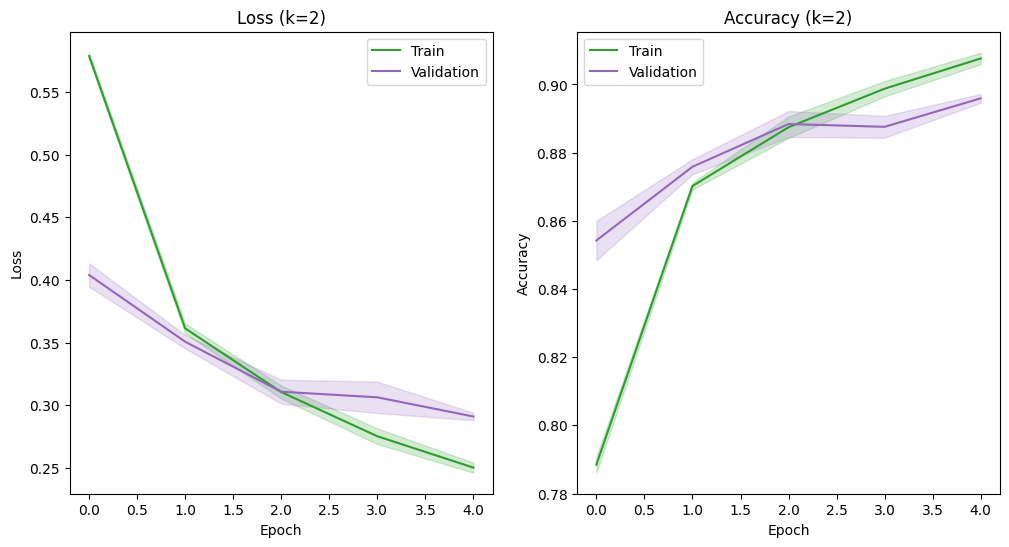

Précision : moyenne=89.592% écart-type=0.128%, k=2


In [ ]:
k=2 # Nombre de folds
epochs=5 # Nombre d'epochs
shapeinput=(28, 28, 1) # Format de l'image 28x28 sur 1 canal
run_evaluation(k,epochs)

# Analyse du modèle

Il y a des signes de sur-entraînement: le modèle a appris par coeur les données d'entrainement. Il n'y a pas assez de données ou les données ne sont pas assez variée. Ce n'est pas ce qu'on veut, car on souhaite qu'il apprenne les paternes.

Comment reconnaître du sur-entraînement? La courbe n'arrive pas à descendre à partir d'un point.
Comment reconnaître du sous-entraînement? La coubre est quasi-droite -> Il n'y a pas assez de données.